### Binary Cof 2-d Gaussian random variables using Bayesian theory.

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

#### Generating Gaussian random variables

In [2]:
def normal_2d(n, m0, m1, C):
    np.random.seed()
    X=np.zeros((2*n, 2))
    X[:n,]= np.dot(np.random.randn(n, 2), C) + m0
    X[n:,]=np.dot(np.random.randn(n, 2), C) + m1
    return X

Cov=np.array([
    [0.5, 0.25],
    [1, -1.5]], 
    dtype=float)

mu0=np.array([0.5, 0.5], dtype=float)
mu1=np.array([1, 1], dtype=float)

sample=normal_2d(n=1000, m0=mu0, m1=mu1, C=Cov)

#### Visualize data

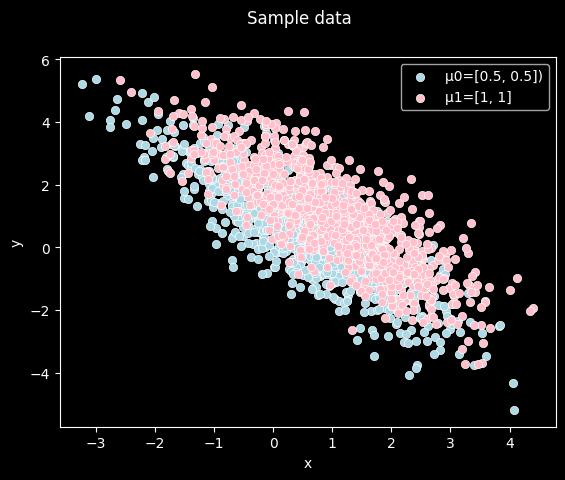

In [3]:
plt.style.use("dark_background")

fig,ax=plt.subplots()
sns.scatterplot(x=sample[:1000,0], y=sample[:1000,1], color="lightblue", label="µ0=[0.5, 0.5])")
sns.scatterplot(x=sample[1000:,0], y=sample[1000:,1], color="pink", label="µ1=[1, 1]")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.suptitle("Sample data")
plt.legend()
plt.show()

#### Data Preparation

In [4]:
y=np.array([0]*1000 + [1]*1000)
train, test, y_train, y_test = train_test_split(sample, y, test_size=0.25)

print("Train size: {}".format(train.shape))
print("Test size: {}".format(test.shape))
print("y_train size: {}".format(y_train.shape))
print("y_test size: {}".format(y_test.shape))

Train size: (1500, 2)
Test size: (500, 2)
y_train size: (1500,)
y_test size: (500,)


In [5]:
#sample values of the train set with label=0
train0=np.array([train[j] for j in range(len(train)) if y_train[j]==0])
#sample values of the train set with label=1
train1=np.array([train[j] for j in range(len(train)) if y_train[j]==1])

train0_mean= np.mean(train0, axis=0)
train1_mean= np.mean(train1, axis=0)

cov_train0= np.cov(train0, rowvar=False)
cov_train1= np.cov(train1, rowvar=False)

fraction_train0=np.round(np.mean(y_train==0), 2)
fraction_train1=np.round(np.mean(y_train==1), 2)

print('----------Category 0----------')
print('Mean:',train0_mean)
print('Covariance Matrix:')
print(cov_train0[0])
print(cov_train0[1])
print('Proportion to the training sample:',fraction_train0)
print('\n')
print('----------Category 1----------')
print('Mean:',train1_mean)
print('Covariance Matrix:')
print(cov_train1[0])
print(cov_train1[1])
print('Proportion to the training sample:',fraction_train1)

----------Category 0----------
Mean: [0.547368   0.43845203]
Covariance Matrix:
[ 1.36159632 -1.48750228]
[-1.48750228  2.3122332 ]
Proportion to the training sample: 0.5


----------Category 1----------
Mean: [0.9755809  0.97916375]
Covariance Matrix:
[ 1.28550367 -1.43173701]
[-1.43173701  2.3782164 ]
Proportion to the training sample: 0.5


#### Bayesian Classifier

In [6]:
#Discriminant function
def g(x, S, S_inv, S_det, mu, Pw):

    W_i= -0.5*S_inv
    w= np.dot(S_inv, mu)
    w_io= (-0.5*np.dot(mu.T, np.dot(S_inv, mu))) - (0.5)*np.log(S_det) + np.log(Pw)
    
    return np.dot(x.T, np.dot(W_i, x)) + np.dot(w,x) + w_io

#Constants parameters for g
S0_inv= np.linalg.inv(cov_train0)
S1_inv= np.linalg.inv(cov_train1)
S0_det= np.linalg.det(cov_train0)
S1_det= np.linalg.det(cov_train1)

#Priori Prob
Pw0= len(train0)/len(train)
Pw1= 1 - Pw0


def classifier(x):
    g0=g(x, cov_train0, S0_inv, S0_det, mu0, Pw0)
    g1=g(x, cov_train1, S1_inv, S1_det, mu1, Pw1)
    if  g0 > g1:
        return 0
    else:
        return 1

#### Results

In [7]:
#sample values of the test set with label=0
test0=np.array([test[j] for j in range(len(test)) if y_test[j]==0])
#sample values of the test set with label=1
test1=np.array([test[j] for j in range(len(test)) if y_test[j]==1])

predictions0= np.array([classifier(test0[i]) for i in range(len(test0))])
predictions1= np.array([classifier(test1[i]) for i in range(len(test1))])


total_errors= sum(predictions0 != 0) + sum(predictions1 != 1) 
error = total_errors / (len(predictions0)+len(predictions1))
print('Total Errors:', total_errors)
print(f'Percentual Error: {error*100}%')

Total Errors: 136
Percentual Error: 27.200000000000003%


95% confidence interval for the proportion of errors

In [8]:
n= 1000
z= 1.98 
m= math.sqrt(error*(1-error)/len(test) + (z/(2*len(test)))**2)
std= m / (1 + (z**2 /1000))
CI=[round(error - z*std,5), round(error + z*std,5)]
print('95% CI:',CI)

95% CI: [0.23256, 0.31144]
